In [8]:
####### Import #######
from sklearn.datasets import fetch_openml
from sklearn import model_selection
from sklearn import neighbors
import sklearn
import numpy as np
from matplotlib import pyplot as plt
from sklearn.model_selection import KFold
import time
import statistics
from sklearn import metrics

In [3]:
####### Loading data #######
mnist = fetch_openml('mnist_784',as_frame=False)

In [3]:
### Create vector of 5000 random indexes
rand_indexes = np.random.randint(70000, size=5000)
### Load data with the previous vector
data = mnist.data[rand_indexes]
# print("Dataset : ", data)
target = mnist.target[rand_indexes]
# print("Etiquettes : ", target)

### Split the dataset for training and testing
# xtrain data set d'entraînement et ytrain étiquettes de xtrain
# xtest dataset de prédiction et ytest étiquettes de xtest
xtrain, xtest, ytrain, ytest = model_selection.train_test_split(data, target,train_size=0.8)

# On entraîne avec k = 10
n_neighbors = 10
clf = neighbors.KNeighborsClassifier(n_neighbors)
# Training with xtrain,ytrain
clf.fit(xtrain, ytrain)
# Predicting with xtest
pred = clf.predict(xtest)
# print("Prédiction : ", pred)
# Predicting probabilities with xtest
pred_proba = clf.predict_proba(xtest)
# print("Probabilités : ", pred_proba)
# Computing the score with xtest,ytest
score = clf.score(xtest, ytest)
print("Classe image 4 : ", target[3])
print("Classe prédite image 4 : ", pred[3])
print("Score échantillon de test : ", score)
scoreApp = clf.score(xtrain, ytrain)
print("Score données apprentissage : ", scoreApp)

Classe image 4 :  7
Classe prédite image 4 :  3
Score échantillon de test :  0.907
Score données apprentissage :  0.93375


In [18]:
####### Variation du nombre k de voisins #######

### Create vector of 5000 random indexes
rand_indexes = np.random.randint(70000, size=5000)
### Load data with the previous vector
data = mnist.data[rand_indexes]
# print("Dataset : ", data)
target = mnist.target[rand_indexes]
# print("Etiquettes : ", target)

### Split the data in 10 chunks
kf = KFold(n_splits=10, random_state=None, shuffle=True)

# Initialisation des métriques
all_scores = []
k_scores = []
all_training_times = []
k_training_times = []
all_predicting_times = []
k_prediction_times = []

# Fais varier le nombre de voisins de 2 à 15
for k in range(2,16):
    print("Computing for k =", k, "...")
    k_scores = []
    k_training_times = []
    k_prediction_times = []
    # Boucle sur chaque paire de jeu de données entraînement/test
    for train_index, test_index in kf.split(data):
        X_train, X_test = data[train_index], data[test_index]
        y_train, y_test = target[train_index], target[test_index]
        
        t1 = round(time.time(),5)
        clf = neighbors.KNeighborsClassifier(k)
        # On entraîne l'algorithme sur xtrain et ytrain
        clf.fit(X_train, y_train)
        t2 = round(time.time(),5)
        # On prédit sur xtest
        pred = clf.predict(X_test)
        t3 = round(time.time(),5)
        # Probabilités des prédictions sur xtest
        pred_proba = clf.predict_proba(X_test)
        # On calcule le score obtenu sur xtest avec les étiquettes ytest
        # et l'ajoute à la liste des scores
        k_scores.append(clf.score(X_test, y_test))
        k_training_times.append(t2-t1)
        k_prediction_times.append(t3-t2)
    all_scores.append(k_scores)
    all_training_times.append(k_training_times)
    all_predicting_times.append(k_prediction_times)
print("Done")

Computing for k = 2 ...
Computing for k = 3 ...
Computing for k = 4 ...
Computing for k = 5 ...
Computing for k = 6 ...
Computing for k = 7 ...
Computing for k = 8 ...
Computing for k = 9 ...
Computing for k = 10 ...
Computing for k = 11 ...
Computing for k = 12 ...
Computing for k = 13 ...
Computing for k = 14 ...
Computing for k = 15 ...
Done


Text(108.0, 0.5, 'Predicting times (in ms)')

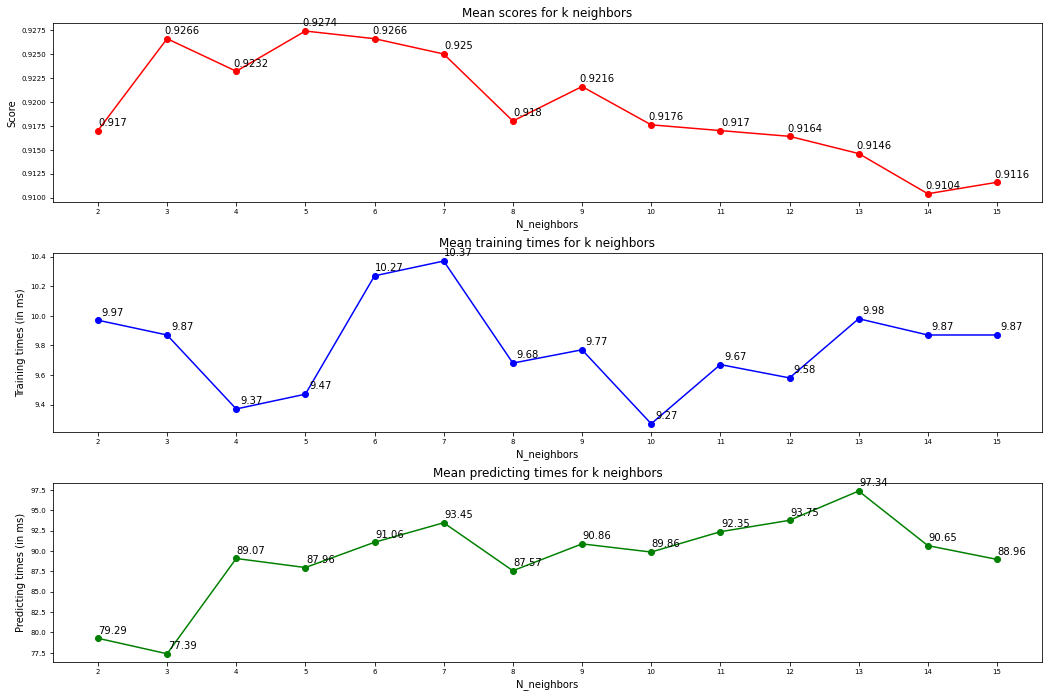

In [23]:
##### x coordinates
x = np.arange(2,16,1)
mean_scores = []
mean_training_times = []
mean_predicting_times = []
for i in range(len(all_scores)):
    mean_scores += [round(statistics.mean(all_scores[i]),5)]
    mean_training_times += [round(statistics.mean(all_training_times[i])*1000,2)]
    mean_predicting_times += [round(statistics.mean(all_predicting_times[i])*1000,2)]
mean_scores = np.float64(mean_scores)
mean_training_times = np.float64(mean_training_times)
mean_predicting_times = np.float64(mean_predicting_times)

### Create plot
fig, figs = plt.subplots(nrows=3, ncols=1, figsize=(15,10))
fig.tight_layout(pad=3.0)
figs[0].plot(x,mean_scores, marker='o', color='r')
figs[1].plot(x,mean_training_times, marker='o', color='b')
figs[2].plot(x,mean_predicting_times, marker='o', color='g')

### Add every x coordinates
figs[0].tick_params(axis='both', which='both', labelsize=7, labelbottom=True)
figs[1].tick_params(axis='both', which='both', labelsize=7, labelbottom=True)
figs[2].tick_params(axis='both', which='both', labelsize=7, labelbottom=True)

for i in range(len(x)):
    figs[0].annotate(mean_scores[i], # this is the text
                 (x[i],mean_scores[i]), # these are the coordinates to position the label
                 textcoords="offset points", # how to position the text
                 xytext=(15,5), # distance from text to points (x,y)
                 ha='center') # horizontal alignment can be left, right or center
    figs[1].annotate(mean_training_times[i], # this is the text
                 (x[i],mean_training_times[i]), # these are the coordinates to position the label
                 textcoords="offset points", # how to position the text
                 xytext=(15,5), # distance from text to points (x,y)
                 ha='center') # horizontal alignment can be left, right or center
    figs[2].annotate(mean_predicting_times[i], # this is the text
                 (x[i],mean_predicting_times[i]), # these are the coordinates to position the label
                 textcoords="offset points", # how to position the text
                 xytext=(15,5), # distance from text to points (x,y)
                 ha='center') # horizontal alignment can be left, right or center

figs[0].set_xticks(x)
figs[1].set_xticks(x)
figs[2].set_xticks(x)
    
### Add title and axis names
figs[0].title.set_text('Mean scores for k neighbors')
figs[1].title.set_text('Mean training times for k neighbors')
figs[2].title.set_text('Mean predicting times for k neighbors')
figs[0].set_xlabel('N_neighbors')
figs[1].set_xlabel('N_neighbors')
figs[2].set_xlabel('N_neighbors')
figs[0].set_ylabel('Score')
figs[1].set_ylabel('Training times (in ms)')
figs[2].set_ylabel('Predicting times (in ms)')

In [28]:
####### Variation du pourcentage des échantillons #######

### Create vector of 5000 random indexes
rand_indexes = np.random.randint(70000, size=5000)
### Load data with the previous vector
data = mnist.data[rand_indexes]
# print("Dataset : ", data)
target = mnist.target[rand_indexes]
# print("Etiquettes : ", target)

scores = []
training_times = []
prediction_times = []

### Train the algorithm with various percentage of the dataset used for training
### from 10% to 90% by 10% increment
for j in range (1, 10):
    print("Computing for j =", j*10, "%...")
    # Split the dataset
    xtrain, xtest, ytrain, ytest = model_selection.train_test_split(data, target,train_size=(j/10))
    
    # Training on xtrain,ytrain
    t1 = round(time.time(),5)
    clf = neighbors.KNeighborsClassifier(n_neighbors=3)
    clf.fit(xtrain, ytrain)
    t2 = round(time.time(),5)
    
    # Predicting on xtest
    pred = clf.predict(xtest)
    t3 = round(time.time(),5)
    training_times.append(round(t2-t1,5))
    prediction_times.append(round(t3-t2,5))
    # Probabilités des prédictions sur xtest
    pred_proba = clf.predict_proba(xtest)
    # On calcule le score obtenu sur xtest avec les étiquettes ytest
    scores.append(round(clf.score(xtest, ytest),3))
print("Done")

Computing for j = 10 %...
Computing for j = 20 %...
Computing for j = 30 %...
Computing for j = 40 %...
Computing for j = 50 %...
Computing for j = 60 %...
Computing for j = 70 %...
Computing for j = 80 %...
Computing for j = 90 %...
Done


training_times : 
 [0.00296, 0.002, 0.003, 0.00399, 0.00698, 0.00499, 0.00698, 0.00698, 0.00898]
prediction_times : 
 [0.19548, 0.25033, 0.24833, 0.2244, 0.24136, 0.22241, 0.17752, 0.12467, 0.08975]


Text(108.0, 0.5, 'Times (in ms)')

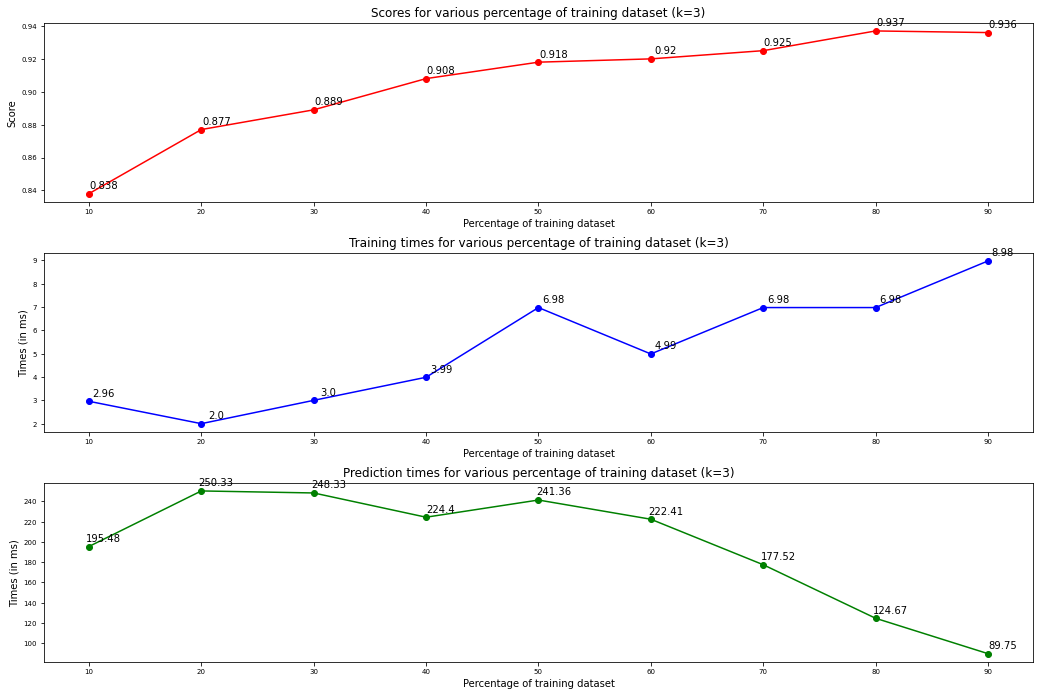

In [30]:
##### x coordinates
x = np.arange(10,100,10)
print("training_times : \n", training_times)
print("prediction_times : \n", prediction_times)

training_times_ms = [round(i*1000,2) for i in training_times]
prediction_times_ms = [round(i*1000,2) for i in prediction_times]

### Create plot
fig, figs = plt.subplots(nrows=3, ncols=1, figsize=(15,10))
fig.tight_layout(pad=3.0)
figs[0].plot(x,scores, marker='o', color='r')
figs[1].plot(x,training_times_ms, marker='o', color='b')
figs[2].plot(x,prediction_times_ms, marker='o', color='g')
### Add every x coordinates
figs[0].tick_params(axis='both', which='both', labelsize=7, labelbottom=True)
figs[1].tick_params(axis='both', which='both', labelsize=7, labelbottom=True)
figs[2].tick_params(axis='both', which='both', labelsize=7, labelbottom=True)

for i in range(len(x)):
    figs[0].annotate(scores[i], # this is the text
                 (x[i],scores[i]), # these are the coordinates to position the label
                 textcoords="offset points", # how to position the text
                 xytext=(15,5), # distance from text to points (x,y)
                 ha='center') # horizontal alignment can be left, right or center
    figs[1].annotate(training_times_ms[i], # this is the text
                 (x[i],training_times_ms[i]), # these are the coordinates to position the label
                 textcoords="offset points", # how to position the text
                 xytext=(15,5), # distance from text to points (x,y)
                 ha='center') # horizontal alignment can be left, right or center
    figs[2].annotate(prediction_times_ms[i], # this is the text
                 (x[i],prediction_times_ms[i]), # these are the coordinates to position the label
                 textcoords="offset points", # how to position the text
                 xytext=(15,5), # distance from text to points (x,y)
                 ha='center') # horizontal alignment can be left, right or center

figs[0].set_xticks(x)
figs[1].set_xticks(x)
figs[2].set_xticks(x)
    
### Add title and axis names
figs[0].title.set_text('Scores for various percentage of training dataset (k=3)')
figs[1].title.set_text('Training times for various percentage of training dataset (k=3)')
figs[2].title.set_text('Prediction times for various percentage of training dataset (k=3)')
figs[0].set_xlabel('Percentage of training dataset')
figs[1].set_xlabel('Percentage of training dataset')
figs[2].set_xlabel('Percentage of training dataset')
figs[0].set_ylabel('Score')
figs[1].set_ylabel('Times (in ms)')
figs[2].set_ylabel('Times (in ms)')

In [33]:
####### Variation de la taille de l'échantillon #######
scores = []
training_times = []
prediction_times = []

for i in range (1,15):
    print("Computing for taille échantillon = ", i*5000, " données...")
    ### Create vector of 5000 random indexes
    rand_indexes = np.random.randint(70000, size=i*5000)
    ### Load data with the previous vector
    data = mnist.data[rand_indexes]
    target = mnist.target[rand_indexes]

    # Split the dataset
    xtrain, xtest, ytrain, ytest = model_selection.train_test_split(data, target,train_size=(0.9))

    # Training on xtrain,ytrain
    t1 = round(time.time(),5)
    clf = neighbors.KNeighborsClassifier(n_neighbors=3)
    clf.fit(xtrain, ytrain)
    t2 = round(time.time(),5)

    # Predicting on xtest
    pred = clf.predict(xtest)
    t3 = round(time.time(),5)
    training_times.append(round(t2-t1,5))
    prediction_times.append(round(t3-t2,5))
    # Probabilités des prédictions sur xtest
    pred_proba = clf.predict_proba(xtest)
    # On calcule le score obtenu sur xtest avec les étiquettes ytest
    scores.append(round(clf.score(xtest, ytest),3))
print("Done")

Computing for taille échantillon =  5000  données...
Computing for taille échantillon =  10000  données...
Computing for taille échantillon =  15000  données...
Computing for taille échantillon =  20000  données...
Computing for taille échantillon =  25000  données...
Computing for taille échantillon =  30000  données...
Computing for taille échantillon =  35000  données...
Computing for taille échantillon =  40000  données...
Computing for taille échantillon =  45000  données...
Computing for taille échantillon =  50000  données...
Computing for taille échantillon =  55000  données...
Computing for taille échantillon =  60000  données...
Computing for taille échantillon =  65000  données...
Computing for taille échantillon =  70000  données...
Done


Text(108.0, 0.5, 'Times (in ms)')

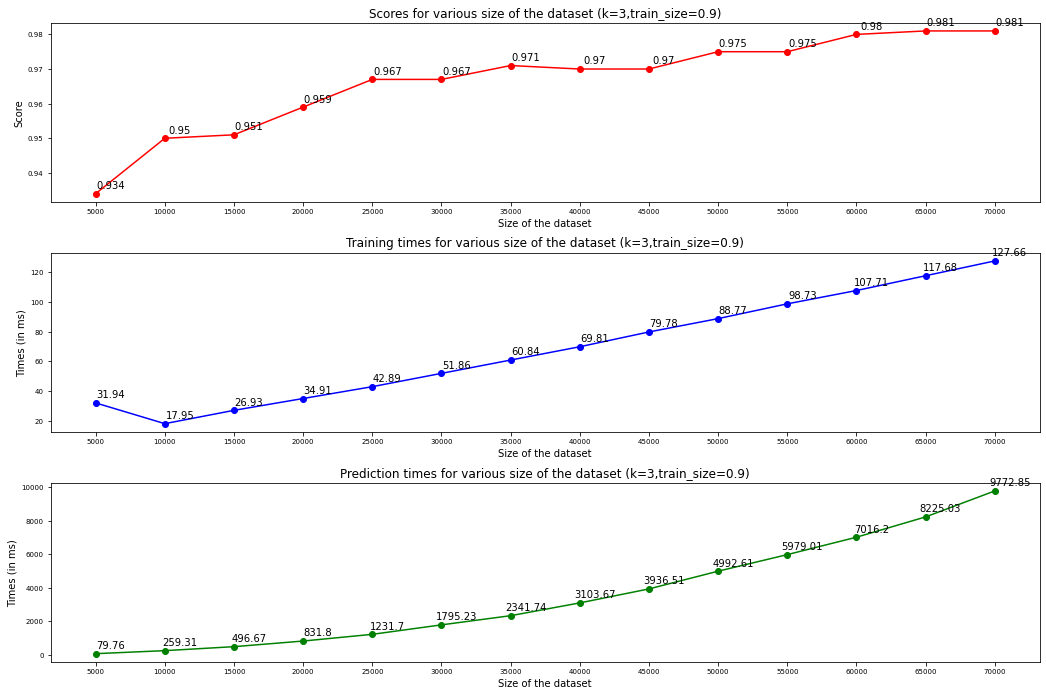

In [34]:
##### x coordinates
x = np.arange(5000,75000,5000)

training_times_ms = [round(i*1000,2) for i in training_times]
prediction_times_ms = [round(i*1000,2) for i in prediction_times]

### Create plot
fig, figs = plt.subplots(nrows=3, ncols=1, figsize=(15,10))
fig.tight_layout(pad=3.0)
figs[0].plot(x,scores, marker='o', color='r')
figs[1].plot(x,training_times_ms, marker='o', color='b')
figs[2].plot(x,prediction_times_ms, marker='o', color='g')
### Add every x coordinates
figs[0].tick_params(axis='both', which='both', labelsize=7, labelbottom=True)
figs[1].tick_params(axis='both', which='both', labelsize=7, labelbottom=True)
figs[2].tick_params(axis='both', which='both', labelsize=7, labelbottom=True)

for i in range(len(x)):
    figs[0].annotate(scores[i], # this is the text
                 (x[i],scores[i]), # these are the coordinates to position the label
                 textcoords="offset points", # how to position the text
                 xytext=(15,5), # distance from text to points (x,y)
                 ha='center') # horizontal alignment can be left, right or center
    figs[1].annotate(training_times_ms[i], # this is the text
                 (x[i],training_times_ms[i]), # these are the coordinates to position the label
                 textcoords="offset points", # how to position the text
                 xytext=(15,5), # distance from text to points (x,y)
                 ha='center') # horizontal alignment can be left, right or center
    figs[2].annotate(prediction_times_ms[i], # this is the text
                 (x[i],prediction_times_ms[i]), # these are the coordinates to position the label
                 textcoords="offset points", # how to position the text
                 xytext=(15,5), # distance from text to points (x,y)
                 ha='center') # horizontal alignment can be left, right or center

figs[0].set_xticks(x)
figs[1].set_xticks(x)
figs[2].set_xticks(x)
    
### Add title and axis names
figs[0].title.set_text('Scores for various size of the dataset (k=3,train_size=0.9)')
figs[1].title.set_text('Training times for various size of the dataset (k=3,train_size=0.9)')
figs[2].title.set_text('Prediction times for various size of the dataset (k=3,train_size=0.9)')
figs[0].set_xlabel('Size of the dataset')
figs[1].set_xlabel('Size of the dataset')
figs[2].set_xlabel('Size of the dataset')
figs[0].set_ylabel('Score')
figs[1].set_ylabel('Times (in ms)')
figs[2].set_ylabel('Times (in ms)')

In [35]:
####### Variation des types de distances utilisées #######

### Create vector of 5000 random indexes
rand_indexes = np.random.randint(70000, size=25000)
### Load data with the previous vector
data = mnist.data[rand_indexes]
# print("Dataset : ", data)
target = mnist.target[rand_indexes]
# print("Etiquettes : ", target)

scores = []
training_times = []
prediction_times = []

### Train the algorithm with various distance types
distances = [1,2,3]
names_distances = ["manhattan","euclidean","minkowski"]

for i in distances:
    print("Computing for d =", names_distances[i-1],"...")
    # Split the dataset
    xtrain, xtest, ytrain, ytest = model_selection.train_test_split(data, target,train_size=0.9)
    
    # Training on xtrain,ytrain
    t1 = round(time.time(),5)
    clf = neighbors.KNeighborsClassifier(n_neighbors=3,p=i)
    print("Fitting...")
    clf.fit(xtrain, ytrain)
    t2 = round(time.time(),5)
    
    # Predicting on xtest
    print("Predicting...")
    pred = clf.predict(xtest)
    t3 = round(time.time(),5)
    training_times.append(round(t2-t1,5))
    prediction_times.append(round(t3-t2,5))
    # Probabilités des prédictions sur xtest
    pred_proba = clf.predict_proba(xtest)
    # On calcule le score obtenu sur xtest avec les étiquettes ytest
    scores.append(round(clf.score(xtest, ytest),3))
print("Done")

Computing for d = manhattan ...
Fitting...
Predicting...
Computing for d = euclidean ...
Fitting...
Predicting...
Computing for d = minkowski ...
Fitting...
Predicting...
Done


names_distances :  ['manhattan', 'euclidean', 'minkowski']
training_times_ms :  [62.87, 46.87, 49.9]
prediction_times_ms :  [55381.76, 1318.48, 667718.1]


Text(63.0, 0.5, 'Times (in ms)')

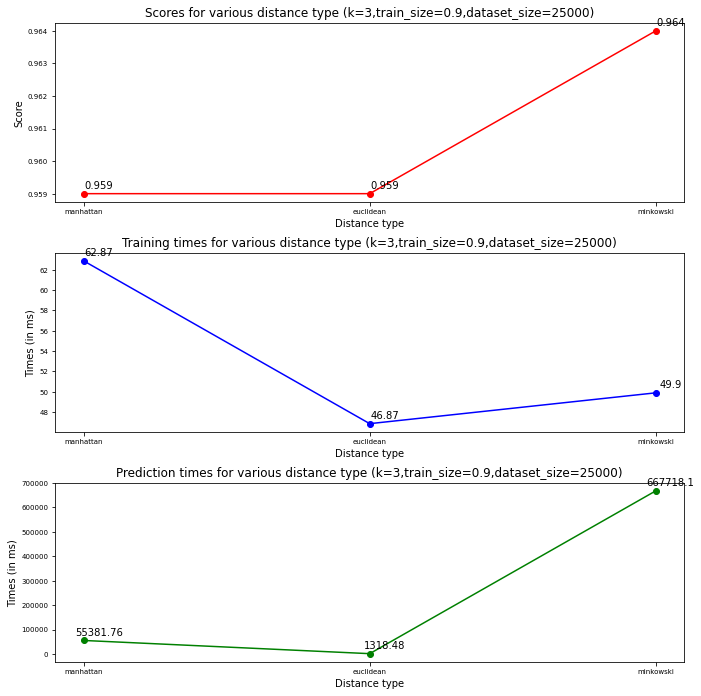

In [40]:
##### x coordinates
x = names_distances
print("names_distances : ", names_distances)
training_times_ms = [round(i*1000,2) for i in training_times]
print("training_times_ms : ", training_times_ms)
prediction_times_ms = [round(i*1000,2) for i in prediction_times]
print("prediction_times_ms : ", prediction_times_ms)

### Create plot
fig, figs = plt.subplots(nrows=3, ncols=1, figsize=(10,10))
fig.tight_layout(pad=3.0)
figs[0].plot(x,scores, marker='o', color='r')
figs[1].plot(x,training_times_ms, marker='o', color='b')
figs[2].plot(x,prediction_times_ms, marker='o', color='g')
### Add every x coordinates
figs[0].tick_params(axis='both', which='both', labelsize=7, labelbottom=True)
figs[1].tick_params(axis='both', which='both', labelsize=7, labelbottom=True)
figs[2].tick_params(axis='both', which='both', labelsize=7, labelbottom=True)

for i in range(len(x)):
    figs[0].annotate(scores[i], # this is the text
                 (x[i],scores[i]), # these are the coordinates to position the label
                 textcoords="offset points", # how to position the text
                 xytext=(15,5), # distance from text to points (x,y)
                 ha='center') # horizontal alignment can be left, right or center
    figs[1].annotate(training_times_ms[i], # this is the text
                 (x[i],training_times_ms[i]), # these are the coordinates to position the label
                 textcoords="offset points", # how to position the text
                 xytext=(15,5), # distance from text to points (x,y)
                 ha='center') # horizontal alignment can be left, right or center
    figs[2].annotate(prediction_times_ms[i], # this is the text
                 (x[i],prediction_times_ms[i]), # these are the coordinates to position the label
                 textcoords="offset points", # how to position the text
                 xytext=(15,5), # distance from text to points (x,y)
                 ha='center') # horizontal alignment can be left, right or center

figs[0].set_xticks(x)
figs[1].set_xticks(x)
figs[2].set_xticks(x)
    
### Add title and axis names
figs[0].title.set_text('Scores for various distance type (k=3,train_size=0.9,dataset_size=25000)')
figs[1].title.set_text('Training times for various distance type (k=3,train_size=0.9,dataset_size=25000)')
figs[2].title.set_text('Prediction times for various distance type (k=3,train_size=0.9,dataset_size=25000)')
figs[0].set_xlabel('Distance type')
figs[1].set_xlabel('Distance type')
figs[2].set_xlabel('Distance type')
figs[0].set_ylabel('Score')
figs[1].set_ylabel('Times (in ms)')
figs[2].set_ylabel('Times (in ms)')

In [5]:
####### Variation de n_jobs #######

### Create vector of 5000 random indexes
rand_indexes = np.random.randint(70000, size=25000)
### Load data with the previous vector
data = mnist.data[rand_indexes]
# print("Dataset : ", data)
target = mnist.target[rand_indexes]
# print("Etiquettes : ", target)

scores = []
training_times = []
prediction_times = []

### Train the algorithm with various distance types
nb_jobs = [-1,1]

for i in nb_jobs:
    print("Computing for n_jobs =", i,"...")
    # Split the dataset
    xtrain, xtest, ytrain, ytest = model_selection.train_test_split(data, target,train_size=0.9)
    
    # Training on xtrain,ytrain
    t1 = round(time.time(),5)
    clf = neighbors.KNeighborsClassifier(n_neighbors=3,p=2,n_jobs=i)
    print("Fitting...")
    clf.fit(xtrain, ytrain)
    t2 = round(time.time(),5)
    
    # Predicting on xtest
    print("Predicting...")
    pred = clf.predict(xtest)
    t3 = round(time.time(),5)
    training_times.append(round(t2-t1,5))
    prediction_times.append(round(t3-t2,5))
    # Probabilités des prédictions sur xtest
    pred_proba = clf.predict_proba(xtest)
    # On calcule le score obtenu sur xtest avec les étiquettes ytest
    scores.append(round(clf.score(xtest, ytest),3))
print("Done")

Computing for n_jobs = -1 ...
Fitting...
Predicting...
Computing for n_jobs = 1 ...
Fitting...
Predicting...
Done


training_times_ms :  [39.89, 48.87]
prediction_times_ms :  [1778.06, 1312.49]


Text(36.0, 0.5, 'Times (in ms)')

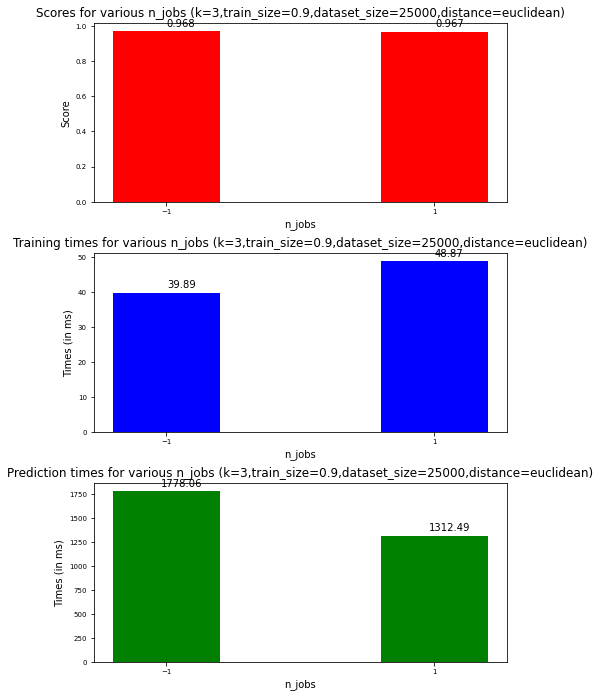

In [7]:
##### x coordinates
x = nb_jobs
training_times_ms = [round(i*1000,2) for i in training_times]
print("training_times_ms : ", training_times_ms)
prediction_times_ms = [round(i*1000,2) for i in prediction_times]
print("prediction_times_ms : ", prediction_times_ms)

### Create plot
fig, figs = plt.subplots(nrows=3, ncols=1, figsize=(7,10))
fig.tight_layout(pad=3.0)
figs[0].bar(x,scores, color='r')
figs[1].bar(x,training_times_ms, color='b')
figs[2].bar(x,prediction_times_ms, color='g')
### Add every x coordinates
figs[0].tick_params(axis='both', which='both', labelsize=7, labelbottom=True)
figs[1].tick_params(axis='both', which='both', labelsize=7, labelbottom=True)
figs[2].tick_params(axis='both', which='both', labelsize=7, labelbottom=True)

for i in range(len(x)):
    figs[0].annotate(scores[i], # this is the text
                 (x[i],scores[i]), # these are the coordinates to position the label
                 textcoords="offset points", # how to position the text
                 xytext=(15,5), # distance from text to points (x,y)
                 ha='center') # horizontal alignment can be left, right or center
    figs[1].annotate(training_times_ms[i], # this is the text
                 (x[i],training_times_ms[i]), # these are the coordinates to position the label
                 textcoords="offset points", # how to position the text
                 xytext=(15,5), # distance from text to points (x,y)
                 ha='center') # horizontal alignment can be left, right or center
    figs[2].annotate(prediction_times_ms[i], # this is the text
                 (x[i],prediction_times_ms[i]), # these are the coordinates to position the label
                 textcoords="offset points", # how to position the text
                 xytext=(15,5), # distance from text to points (x,y)
                 ha='center') # horizontal alignment can be left, right or center

figs[0].set_xticks(x)
figs[1].set_xticks(x)
figs[2].set_xticks(x)
    
### Add title and axis names
figs[0].title.set_text('Scores for various n_jobs (k=3,train_size=0.9,dataset_size=25000,distance=euclidean)')
figs[1].title.set_text('Training times for various n_jobs (k=3,train_size=0.9,dataset_size=25000,distance=euclidean)')
figs[2].title.set_text('Prediction times for various n_jobs (k=3,train_size=0.9,dataset_size=25000,distance=euclidean)')
figs[0].set_xlabel('n_jobs')
figs[1].set_xlabel('n_jobs')
figs[2].set_xlabel('n_jobs')
figs[0].set_ylabel('Score')
figs[1].set_ylabel('Times (in ms)')
figs[2].set_ylabel('Times (in ms)')

In [11]:
### Create vector of 5000 random indexes
rand_indexes = np.random.randint(70000, size=5000)
### Load data with the previous vector
data = mnist.data[rand_indexes]
# print("Dataset : ", data)
target = mnist.target[rand_indexes]

# Split the dataset
xtrain, xtest, ytrain, ytest = model_selection.train_test_split(data, target,train_size=0.9)

# Training on xtrain,ytrain
clf = neighbors.KNeighborsClassifier(n_neighbors=3,p=2,n_jobs=1)
clf.fit(xtrain, ytrain)
# Predicting on xtest
pred = clf.predict(xtest)
print("Matrice de confusion K-NN :\n", metrics.confusion_matrix(ytest, pred))

Matrice de confusion K-NN :
 [[51  0  0  0  0  1  0  0  0  0]
 [ 0 56  0  0  0  0  0  0  0  0]
 [ 3  1 45  1  0  0  1  1  0  0]
 [ 0  1  1 35  0  1  0  1  1  1]
 [ 0  3  0  0 48  0  0  0  0  2]
 [ 0  1  0  1  0 38  0  0  0  0]
 [ 0  0  0  0  0  2 44  0  0  0]
 [ 0  2  0  0  3  0  0 47  0  0]
 [ 2  0  0  0  0  3  1  0 42  2]
 [ 0  0  0  0  4  1  0  1  2 50]]
